<a href="https://colab.research.google.com/github/kr5176/Emotional-analysis-in-nlp/blob/main/Copy_of_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 651.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 664.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=5dd1b6cf952d3504914e1484a439ed48f6452f7d38811e04e975fafbcce84d58
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperf

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/182 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Password(description='YouTube API Key:', layout=Layout(width='50%'), placeholder='Enter your YouTube API key',…

Textarea(value='', layout=Layout(height='100px', width='100%'), placeholder='Enter text to analyze emotions...…

Dropdown(description='Language:', options=(('English', 'en'), ('Spanish', 'es'), ('French', 'fr'), ('German', …

Button(button_style='primary', description='Analyze Emotions', icon='search', style=ButtonStyle())

Output()

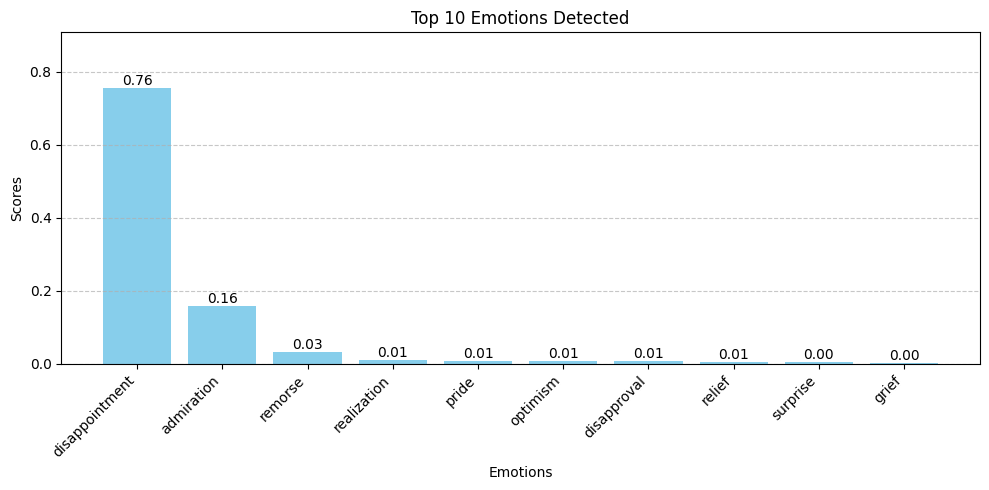

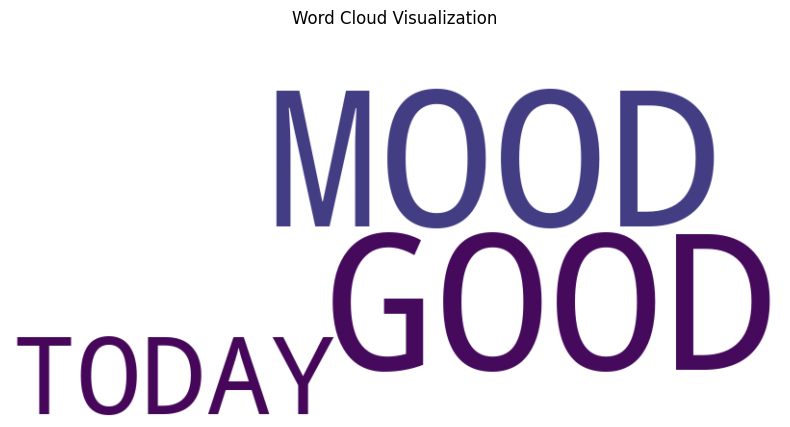

In [ ]:
!pip install ipywidgets matplotlib wordcloud googletrans==4.0.0-rc1 textblob transformers google-api-python-client
!pip install nest_asyncio

# Import necessary libraries
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import pipeline
from googleapiclient.discovery import build
from googletrans import Translator
from textblob import TextBlob
import io
import base64
from IPython.display import Image
import nest_asyncio
import os


nest_asyncio.apply()

translator = Translator()
emotion_analyzer = pipeline("text-classification", model="monologg/bert-base-cased-goemotions-original", return_all_scores=True)

def fig_to_image(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{img_str}" />'

def analyze_emotions(text, target_language='en'):
    # Translate text to English if needed
    if target_language != 'en':
        try:
            translated_text = translator.translate(text, src=target_language, dest='en').text
        except:
            translated_text = text  # Fallback if translation fails
    else:
        translated_text = text

    # Analyze emotions
    emotions = emotion_analyzer(translated_text)
    top_emotion = max(emotions[0], key=lambda x: x['score'])

    # Get sentiment analysis using TextBlob
    sentiment_score = TextBlob(translated_text).sentiment.polarity
    sentiment_label = "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"

    return top_emotion, emotions[0], sentiment_label, sentiment_score, translated_text

# Visualization functions
def plot_emotion_graph(emotion_scores):
    fig, ax = plt.subplots(figsize=(10, 5))

    # Sort emotions by score for better visualization
    sorted_emotions = sorted(emotion_scores, key=lambda x: x['score'], reverse=True)[:10]

    labels = [emotion['label'] for emotion in sorted_emotions]
    scores = [emotion['score'] for emotion in sorted_emotions]

    bars = ax.bar(labels, scores, color='skyblue')

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', rotation=0)

    plt.xlabel('Emotions')
    plt.ylabel('Scores')
    plt.title('Top 10 Emotions Detected')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, min(1, max(scores) * 1.2))  # Adjust ylim based on max score
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    return fig

def plot_wordcloud(text):
    if not text.strip():
        # Return empty figure if text is empty
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.text(0.5, 0.5, "Not enough text for word cloud", ha='center', va='center')
        ax.axis('off')
        return fig

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                         max_words=100, contour_width=3, contour_color='steelblue').generate(text)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.title("Word Cloud Visualization")

    return fig

# YouTube video suggestion function
def fetch_youtube_videos(query, api_key, max_results=3):
    try:
        youtube = build('youtube', 'v3', developerKey=api_key)

        request = youtube.search().list(
            q=query,
            part='snippet',
            type='video',
            maxResults=max_results,
            order='relevance',
            videoDuration='short'
        )
        response = request.execute()

        videos = []
        for item in response['items']:
            video_title = item['snippet']['title']
            video_id = item['id']['videoId']
            video_url = f"https://www.youtube.com/watch?v={video_id}"
            thumbnail_url = item['snippet']['thumbnails']['medium']['url']
            videos.append({
                'title': video_title,
                'url': video_url,
                'thumbnail': thumbnail_url,
                'id': video_id
            })

        return videos
    except Exception as e:
        print(f"Error fetching YouTube videos: {e}")
        return []

# Generate roadmap based on emotion
def dynamic_roadmap(emotion_label):
    roadmap = {
        "joy": [
            "1. Reflect on joyful moments and practice gratitude.",
            "2. Engage in hobbies or social interactions that boost joy.",
            "3. Spread positivity by sharing joyful experiences."
        ],
        "sadness": [
            "1. Talk to a trusted friend or therapist.",
            "2. Engage in creative expression such as art or writing.",
            "3. Focus on small positive moments in your day."
        ],
        "anger": [
            "1. Practice deep breathing to calm your nervous system.",
            "2. Take a short break from the triggering situation.",
            "3. Express your feelings constructively through conversation or writing."
        ],
        "fear": [
            "1. Acknowledge your fear without judgment.",
            "2. Break down overwhelming situations into manageable steps.",
            "3. Practice grounding techniques when anxiety arises."
        ],
        "anxiety": [
            "1. Practice mindfulness meditation for 5-10 minutes daily.",
            "2. Challenge negative thought patterns with evidence-based thinking.",
            "3. Maintain healthy routines for sleep, exercise, and nutrition."
        ]
    }
    return roadmap.get(emotion_label.lower(), ["Continue practicing mindfulness and self-reflection."])

# Build the frontend interface
def create_emotion_analysis_app():
    # Style definitions
    style = """
    <style>
    .result-container {
        border: 1px solid #ddd;
        border-radius: 8px;
        padding: 15px;
        margin: 15px 0;
        background-color: #f9f9f9;
    }
    .emotion-header {
        font-size: 18px;
        font-weight: bold;
        color: #333;
        margin-bottom: 10px;
    }
    .emotion-score {
        font-size: 16px;
        color: #555;
    }
    .sentiment-container {
        display: inline-block;
        padding: 5px 10px;
        border-radius: 15px;
        font-weight: bold;
        margin-top: 10px;
    }
    .positive {
        background-color: #d4edda;
        color: #155724;
    }
    .negative {
        background-color: #f8d7da;
        color: #721c24;
    }
    .neutral {
        background-color: #e2e3e5;
        color: #383d41;
    }
    .roadmap-container {
        background-color: #e8f4f8;
        border-left: 4px solid #4a8cca;
        padding: 10px 15px;
        margin: 15px 0;
    }
    .roadmap-title {
        font-weight: bold;
        color: #2c5282;
        margin-bottom: 10px;
    }
    .video-container {
        display: flex;
        flex-wrap: wrap;
        gap: 15px;
        margin-top: 15px;
    }
    .video-card {
        border: 1px solid #ddd;
        border-radius: 5px;
        padding: 10px;
        width: 300px;
        box-shadow: 0 2px 4px rgba(0,0,0,0.1);
    }
    .video-title {
        font-weight: bold;
        margin-top: 5px;
        height: 40px;
        overflow: hidden;
    }
    </style>
    """

    # API key input
    api_key_input = widgets.Password(
        description='YouTube API Key:',
        placeholder='Enter your YouTube API key',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    # Text input
    text_input = widgets.Textarea(
        placeholder='Enter text to analyze emotions...',
        layout=widgets.Layout(width='100%', height='100px')
    )

    # Language selection
    language_dropdown = widgets.Dropdown(
        options=[
            ('English', 'en'),
            ('Spanish', 'es'),
            ('French', 'fr'),
            ('German', 'de'),
            ('Italian', 'it'),
            ('Portuguese', 'pt'),
            ('Russian', 'ru'),
            ('Japanese', 'ja'),
            ('Chinese', 'zh-cn'),
            ('Hindi', 'hi'),
            ('Arabic', 'ar'),
            ('Bengali', 'bn'),
            ('Tamil', 'ta'),
            ('Telugu', 'te'),
            ('Marathi', 'mr'),
            ('Urdu', 'ur')
        ],
        value='en',
        description='Language:',
        style={'description_width': 'initial'}
    )

    # Analyze button
    analyze_button = widgets.Button(
        description='Analyze Emotions',
        button_style='primary',
        icon='search'
    )

    # Output area
    output = widgets.Output()

    # Function to handle button click
    def on_analyze_button_clicked(b):
        with output:
            clear_output()

            # Get input values
            text = text_input.value
            language = language_dropdown.value
            api_key = api_key_input.value

            if not text:
                print("Please enter some text to analyze.")
                return

            # Display loading message
            display(HTML("<p>Analyzing emotions... Please wait.</p>"))

            try:
                # Perform emotion analysis
                top_emotion, all_emotions, sentiment_label, sentiment_score, translated_text = analyze_emotions(text, language)

                # Clear the previous output
                clear_output()

                # Display style
                display(HTML(style))

                # Display analysis results
                emotion_html = f"""
                <div class="result-container">
                    <div class="emotion-header">Top Emotion: {top_emotion['label'].capitalize()}</div>
                    <div class="emotion-score">Score: {top_emotion['score']:.2f}</div>
                    <div class="sentiment-container {sentiment_label.lower()}">{sentiment_label} Sentiment ({sentiment_score:.2f})</div>
                </div>
                """
                display(HTML(emotion_html))

                # Display emotion graph
                emotion_fig = plot_emotion_graph(all_emotions)
                display(HTML(fig_to_image(emotion_fig)))

                # Display word cloud if text is long enough
                if len(text.split()) > 3:
                    wordcloud_fig = plot_wordcloud(translated_text)
                    display(HTML(fig_to_image(wordcloud_fig)))

                # Display roadmap
                roadmap = dynamic_roadmap(top_emotion['label'])
                roadmap_html = f"""
                <div class="roadmap-container">
                    <div class="roadmap-title">Your Personal Roadmap for Managing {top_emotion['label'].capitalize()}</div>
                    {''.join(f'<p>{step}</p>' for step in roadmap)}
                </div>
                """
                display(HTML(roadmap_html))

                # Fetch and display YouTube recommendations if API key is provided
                if api_key:
                    emotion_query = {
                        "joy": "how to sustain happiness",
                        "sadness": "uplifting talks for sadness",
                        "anger": "anger management techniques",
                        "fear": "overcoming fear motivation",
                        "anxiety": "anxiety relief techniques",
                        "love": "ways to express love",
                        "surprise": "embracing unexpected moments",
                        "disgust": "managing negative reactions",
                        "confusion": "clarifying complex thoughts",
                        "admiration": "cultivating appreciation",
                        "gratitude": "practicing thankfulness"
                    }.get(top_emotion['label'].lower(), "mindfulness exercises")

                    videos = fetch_youtube_videos(emotion_query, api_key)

                    if videos:
                        videos_html = f"""
                        <h3>Recommended Videos for {top_emotion['label'].capitalize()}</h3>
                        <div class="video-container">
                        """

                        for video in videos:
                            videos_html += f"""
                            <div class="video-card">
                                <a href="{video['url']}" target="_blank">
                                    <img src="{video['thumbnail']}" width="100%" />
                                    <div class="video-title">{video['title']}</div>
                                </a>
                            </div>
                            """

                        videos_html += "</div>"
                        display(HTML(videos_html))
                    else:
                        display(HTML("<p>No video recommendations available. Check your API key.</p>"))
                else:
                    display(HTML("<p>Enter a YouTube API key to see video recommendations.</p>"))

            except Exception as e:
                clear_output()
                print(f"Error analyzing emotions: {e}")

    # Connect the button click event
    analyze_button.on_click(on_analyze_button_clicked)

    # Display the UI components
    display(HTML("<h1>Emotion Analysis Tool</h1>"))
    display(HTML("<p>This tool analyzes the emotions in your text and provides personalized recommendations.</p>"))
    display(api_key_input)
    display(text_input)
    display(language_dropdown)
    display(analyze_button)
    display(output)

# Run the app
create_emotion_analysis_app()